# Obtain Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

# Explore

### Column Names and Descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


# Scrub

### Checking for/filling missing values

In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
295.0     0.000046
2250.0    0.000046
1990.0    0.000046
1248.0    0.000046
652.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [10]:
df['sqft_basement'].replace(to_replace='?',value=np.NaN, inplace = True)
df['sqft_basement'].value_counts(normalize=True, dropna=False)

0.0       0.593879
NaN       0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
516.0     0.000046
2120.0    0.000046
2250.0    0.000046
1990.0    0.000046
1248.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

### Converting 'date' to datetime

In [11]:
df['date'] = pd.to_datetime(df['date'])
df = df.astype({'sqft_basement':'float64'})
display(df.head())
df.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [12]:
for col in ['view','sqft_basement','waterfront','yr_renovated']:
    print(f'"{col}" Value Counts:\n', df[col].value_counts(normalize=True), '\n')
    df[col] = df[col].fillna(value=0.0)   #filling missing values with 0.0
df.isna().sum()

"view" Value Counts:
 0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64 

"sqft_basement" Value Counts:
 0.0       0.606631
600.0     0.010263
500.0     0.009885
700.0     0.009838
800.0     0.009507
            ...   
915.0     0.000047
295.0     0.000047
1281.0    0.000047
2130.0    0.000047
906.0     0.000047
Name: sqft_basement, Length: 303, dtype: float64 

"waterfront" Value Counts:
 0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64 

"yr_renovated" Value Counts:
 0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64 



id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Removing duplicates in data

In [13]:
df.id.duplicated().sum()

177

In [14]:
df_id_dups = df[df.duplicated('id')]

In [15]:
df.drop_duplicates(subset= 'id', keep='last', inplace = True)

In [16]:
df.id.duplicated().sum()

0

In [17]:
df[df['bedrooms']==df['bedrooms'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


### Removing Outliers

In [18]:
df = df.drop(labels = 15856)

In [19]:
df[df['bedrooms']==df['bedrooms'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,2014-08-21,520000.0,11,3.0,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.556,-122.363,1420,4960


450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    149
325000.0    146
400000.0    144
Name: price, dtype: int64

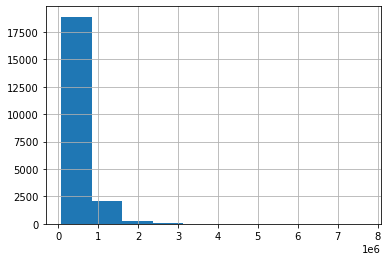

In [20]:
display(df['price'].value_counts().head(7))
df['price'].hist()

In [21]:
for i in range(80, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.8 percentile: 705000.0
0.81 percentile: 720000.0
0.82 percentile: 733000.0
0.83 percentile: 750000.0
0.84 percentile: 762500.0
0.85 percentile: 780000.0
0.86 percentile: 799924.0
0.87 percentile: 815741.94
0.88 percentile: 839000.0
0.89 percentile: 860000.0
0.9 percentile: 889000.0
0.91 percentile: 920000.0
0.92 percentile: 951000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [22]:
df_new = df[df['price'] < 1.45e6]
df_new['price'].max()

1440000.0

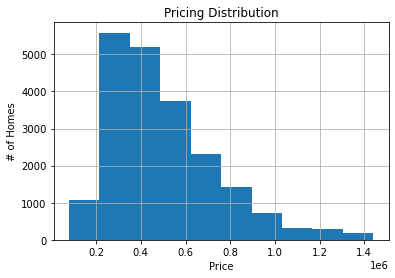

In [23]:
df_new['price'].hist()
plt.title('Pricing Distribution')
plt.xlabel('Price')
plt.ylabel('# of Homes')

plt.savefig("Price Distribution")

### Creating dataframe with log data (based on strong initial features)

In [24]:
df_log = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','grade','sqft_living15', 'sqft_above', 'sqft_lot15']]
df_log.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_living15,sqft_above,sqft_lot15
0,221900.0,3,1.00,1180,5650,7,1340,1180,5650
1,538000.0,3,2.25,2570,7242,7,1690,2170,7639
2,180000.0,2,1.00,770,10000,6,2720,770,8062
3,604000.0,4,3.00,1960,5000,7,1360,1050,5000
4,510000.0,3,2.00,1680,8080,8,1800,1680,7503


In [25]:
for col in df_log.columns:
    df_log[col] = df_log[col].map(lambda x: np.log(x))
    df_log.rename(columns = {col: 'log_'+col}, inplace=True)
df_log.head(3)

<ipython-input-25-6968d145380a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_log[col] = df_log[col].map(lambda x: np.log(x))
C:\Users\Nick\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_grade,log_sqft_living15,log_sqft_above,log_sqft_lot15
0,12.309982,1.098612,0.00000,7.073270,8.639411,1.945910,7.200425,7.073270,8.639411
1,13.195614,1.098612,0.81093,7.851661,8.887653,1.945910,7.432484,7.682482,8.941022
2,12.100712,0.693147,0.00000,6.646391,9.210340,1.791759,7.908387,6.646391,8.994917


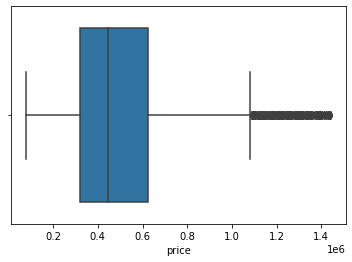

In [26]:
sns.boxplot(x = df_new['price'])

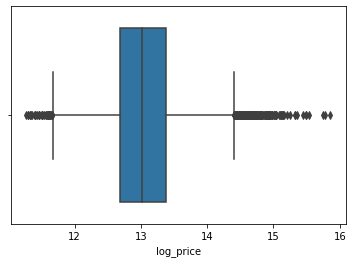

In [27]:
sns.boxplot(x = df_log['log_price'])

### Reviewing possible correlation and multicorrelation with heatmap

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


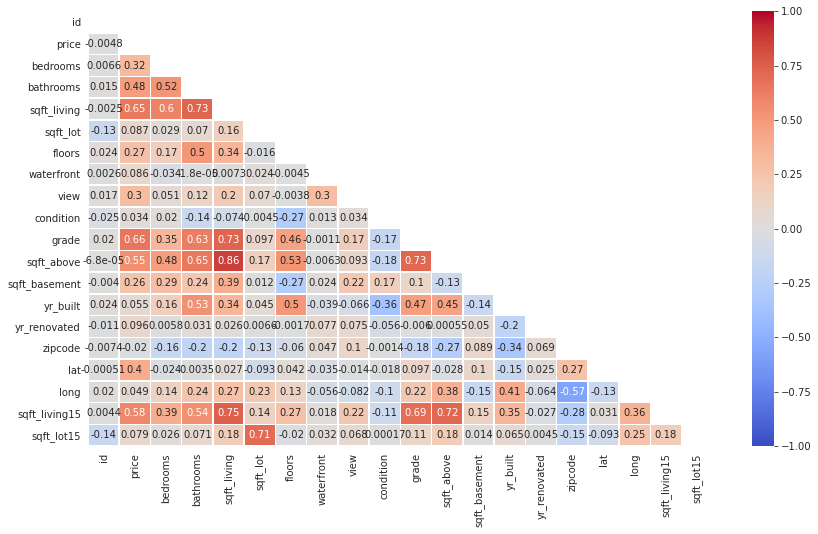

In [28]:
mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(df_new.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True, vmin=-1, vmax=1)
print(df_new.columns)
plt.savefig("DF Heatmap")

Index(['log_price', 'log_bedrooms', 'log_bathrooms', 'log_sqft_living',
       'log_sqft_lot', 'log_grade', 'log_sqft_living15', 'log_sqft_above',
       'log_sqft_lot15'],
      dtype='object')


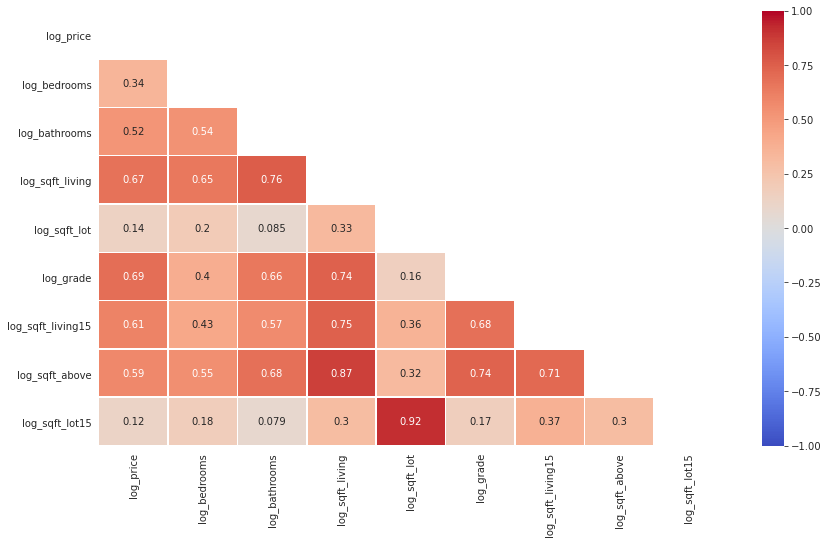

In [29]:
mask = np.zeros_like(df_log.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(df_log.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True, vmin=-1, vmax=1)
print(df_log.columns)
plt.savefig("Log Heatmap")

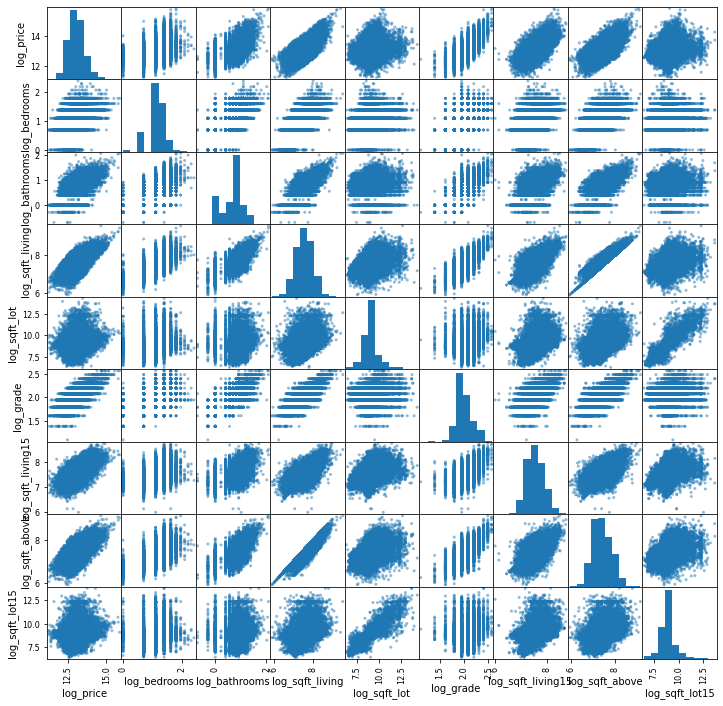

In [30]:
pd.plotting.scatter_matrix(df_log, figsize=(12,12), diagonal='hist');

In [31]:
#### We notice that price seems to be most heavily influenced by sqft_living, bathrooms,  view, grade.

In [32]:
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize = True, ascending = False).head(5))
    print('--------------------------------------------')

id
2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64
--------------------------------------------
date
2014-06-23    0.006630
2014-06-25    0.006023
2014-06-26    0.005929
2015-04-27    0.005883
2015-03-25    0.005743
Name: date, dtype: float64
--------------------------------------------
price
450000.0    0.008030
350000.0    0.007797
550000.0    0.007330
500000.0    0.007050
425000.0    0.006956
Name: price, dtype: float64
--------------------------------------------
bedrooms
3    0.454316
4    0.319763
2    0.127737
5    0.074046
6    0.012372
Name: bedrooms, dtype: float64
--------------------------------------------
bathrooms
2.50    0.249872
1.00    0.177132
1.75    0.140950
2.25    0.094822
2.00    0.089313
Name: bathrooms, dtype: float64
--------------------------------------------
sqft_living
1300    0.006350
1440    0.006209
1400    0.006163
1660    0.005976
1800    0.005976
Name: sqft_l

In [33]:
df_new.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

# Model

In [34]:
for col in ['bedrooms', 'bathrooms', 'sqft_living',
            'grade', 'sqft_living15', 'sqft_above']:
    f = 'price' + '~' + col
    print(col.upper())
    slr_model = ols(formula= f, data=df_new).fit()
    display(slr_model.summary())
    
    y_hat = slr_model.predict(df_new[col])
    residuals = y_hat - df_new['price']
    mse = np.sum((residuals)**2)/len(df_new['price'])
    print('MSE:', mse)
    print('RMSE Train:', np.sqrt(mse), '\n\n')

BEDROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2353.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:01   Log-Likelihood:            -2.8674e+05
No. Observations:               20836   AIC:                         5.735e+05
Df Residuals:                   20834   BIC:                         5.735e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.102e+05   6174.397     34.042      0.000    1.98e+05    2.22e+05
bedrooms     8.64e+04   1781.262     48.507      0.000    8.29e+04    8.99e+04
==============================================================================
Omnibus:                     3364.317   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5680.614
Skew:                           1.072   Prob(JB):                         0.00
Kurtosis:                       4.394   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 52587627581.18804
RMSE Train: 229319.92408246617 


BATHROOMS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     6287.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:01   Log-Likelihood:            -2.8511e+05
No. Observations:               20836   AIC:                         5.702e+05
Df Residuals:                   20834   BIC:                         5.702e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.665e+05   4450.153     37.421      0.000    1.58e+05    1.75e+05
bathrooms   1.601e+05   2019.491     79.291      0.000    1.56e+05    1.64e+05
==============================================================================
Omnibus:                     3015.221   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4949.775
Skew:                           0.986   Prob(JB):                         0.00
Kurtosis:                       4.347   Cond. No.                         7.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 44959508356.821785
RMSE Train: 212036.57315855156 


SQFT_LIVING


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.530e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:01   Log-Likelihood:            -2.8212e+05
No. Observations:               20836   AIC:                         5.642e+05
Df Residuals:                   20834   BIC:                         5.643e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.11e+05   3390.042     32.743      0.000    1.04e+05    1.18e+05
sqft_living   192.4456      1.556    123.679      0.000     189.396     195.496
==============================================================================
Omnibus:                     2638.681   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4562.525
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                       4.529   Cond. No.                     5.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE: 33748481056.553387
RMSE Train: 183707.5966217875 


GRADE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 1.598e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:01   Log-Likelihood:            -2.8192e+05
No. Observations:               20836   AIC:                         5.639e+05
Df Residuals:                   20834   BIC:                         5.639e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.156e+05   8910.190    -69.087      0.000   -6.33e+05   -5.98e+05
grade       1.469e+05   1162.187    126.430      0.000    1.45e+05    1.49e+05
==============================================================================
Omnibus:                     2986.061   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5280.930
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                       4.599   Cond. No.                         55.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 33117748964.330883
RMSE Train: 181982.82601479426 


SQFT_LIVING15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.084e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:01   Log-Likelihood:            -2.8349e+05
No. Observations:               20836   AIC:                         5.670e+05
Df Residuals:                   20834   BIC:                         5.670e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.063e+04   4339.034     16.279      0.000    6.21e+04    7.91e+04
sqft_living15   219.7593      2.111    104.104      0.000     215.622     223.897
==============================================================================
Omnibus:                     3714.956   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7410.298
Skew:                           1.081   Prob(JB):                         0.00
Kurtosis:                       4.965   Cond. No.                     6.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE: 38499598139.72739
RMSE Train: 196213.14466601718 


SQFT_ABOVE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     9184.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:01   Log-Likelihood:            -2.8405e+05
No. Observations:               20836   AIC:                         5.681e+05
Df Residuals:                   20834   BIC:                         5.681e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.92e+05   3500.411     54.849      0.000    1.85e+05    1.99e+05
sqft_above   176.6262      1.843     95.834      0.000     173.014     180.239
==============================================================================
Omnibus:                     3309.252   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5892.982
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       4.607   Cond. No.                     4.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MSE: 40620367179.6777
RMSE Train: 201544.950767013 




### Baseline Model

In [35]:
outcome = 'price'
x_cols = df.dropna().drop(['price', 'date'], axis = 1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model1 = ols(formula= f, data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2633.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:02   Log-Likelihood:            -2.9196e+05
No. Observations:               21419   AIC:                         5.840e+05
Df Residuals:                   21399   BIC:                         5.841e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.171e+06   2.95e+06      2.434      0.015     1.4e+06    1.29e+07
id            -1.348e-06   4.85e-07     -2.782      0.005    -2.3e-06   -3.98e-07
bedrooms      -3.931e+04   1993.131    -19.725      0.000   -4.32e+04   -3.54e+04
bathrooms      4.329e+04   3282.787     13.186      0.000    3.69e+04    4.97e+04
sqft_living     105.3089     18.119      5.812      0.000      69.794     140.823
sqft_lot          0.1165      0.048      2.426      0.015       0.022       0.211
floors         6693.9398   3610.158      1.854      0.064    -382.239    1.38e+04
waterfront      6.16e+05   1.81e+04     33.940      0.000     5.8e+05    6.52e+05
view           5.305e+04   2130.575     24.898      0.000    4.89e+04    5.72e+04
condition       2.64e+04   2362.706     11.173      0.000    2.18e+04     3.1e+04
grade          9.657e+04   2171.813     44.466      0.000    9.23e+04    1.01e+05
sqft_above       77.4170     18.105      4.276      0.000      41.930     112.904
sqft_basement    47.6831     17.943      2.658      0.008      12.514      82.852
yr_built      -2663.2880     72.246    -36.864      0.000   -2804.896   -2521.680
yr_renovated     23.1952      3.991      5.812      0.000      15.373      31.017
zipcode        -586.3506     33.159    -17.683      0.000    -651.344    -521.357
lat                6e+05   1.08e+04     55.660      0.000    5.79e+05    6.21e+05
long          -2.158e+05   1.32e+04    -16.312      0.000   -2.42e+05    -1.9e+05
sqft_living15    20.9712      3.461      6.060      0.000      14.188      27.755
sqft_lot15       -0.4067      0.074     -5.525      0.000      -0.551      -0.262
==============================================================================
Omnibus:                    18153.093   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1811817.748
Skew:                           3.550   Prob(JB):                         0.00
Kurtosis:                      47.494   Cond. No.                     1.16e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### QQ Plot and Histogram

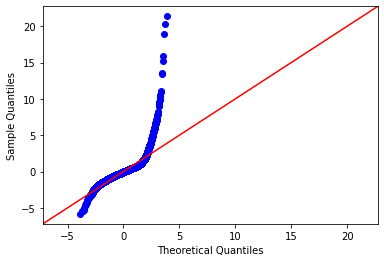

In [36]:
#  QQ Plot for Baseline
fig_new = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)
plt.savefig("QQ Baseline")

Here we can see the QQ Plot for the baseline isn't matching up well.

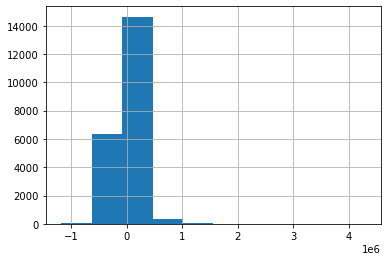

In [37]:
model1.resid.hist()
plt.savefig("Baseline Histogram")

Our histogram of the data confirms our suspicion that the baseline has some skew.

### "New" Model

In [38]:
outcome = df_new['price']
x_cols = df_new.dropna().drop(['price', 'sqft_basement', 'id', 'date', 'sqft_living15'], axis = 1).columns

In [39]:
df_y = df_new['price'].to_frame()
X1 = '+'.join(list(x_cols))
y = list(df_y.columns)[0]
f = str(y) + '~' + X1

model_new = ols(formula= f, data=df_new).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     3091.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:02   Log-Likelihood:            -2.7518e+05
No. Observations:               20836   AIC:                         5.504e+05
Df Residuals:                   20819   BIC:                         5.505e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.206e+06   1.93e+06      0.626      0.531   -2.57e+06    4.98e+06
bedrooms     -1.368e+04   1347.383    -10.156      0.000   -1.63e+04    -1.1e+04
bathrooms     2.636e+04   2219.251     11.876      0.000     2.2e+04    3.07e+04
sqft_living     96.6115      3.019     32.001      0.000      90.694     102.529
sqft_lot         0.1618      0.033      4.967      0.000       0.098       0.226
floors        2.633e+04   2410.652     10.923      0.000    2.16e+04    3.11e+04
waterfront    1.855e+05   1.64e+04     11.324      0.000    1.53e+05    2.18e+05
view           4.42e+04   1469.093     30.088      0.000    4.13e+04    4.71e+04
condition     2.583e+04   1568.135     16.470      0.000    2.28e+04    2.89e+04
grade          9.09e+04   1408.055     64.557      0.000    8.81e+04    9.37e+04
sqft_above      10.9550      2.986      3.669      0.000       5.102      16.808
yr_built     -2065.8450     48.578    -42.527      0.000   -2161.061   -1970.629
yr_renovated    15.9150      2.727      5.836      0.000      10.569      21.261
zipcode       -335.1036     21.972    -15.252      0.000    -378.170    -292.037
lat           5.714e+05   7089.132     80.601      0.000    5.57e+05    5.85e+05
long         -6.551e+04   8667.704     -7.558      0.000   -8.25e+04   -4.85e+04
sqft_lot15      -0.1240      0.050     -2.496      0.013      -0.221      -0.027
==============================================================================
Omnibus:                     3525.976   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10585.476
Skew:                           0.886   Prob(JB):                         0.00
Kurtosis:                       6.008   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### QQ Plot and Histogram

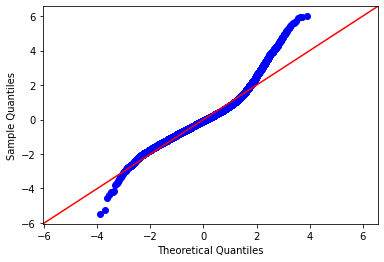

In [40]:
fig_new = sm.graphics.qqplot(model_new.resid, dist=stats.norm, line='45', fit=True)
plt.savefig("QQ Plot New Model")

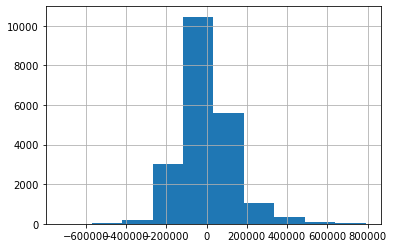

In [41]:
model_new.resid.hist()
plt.savefig("Histogram New Model")

In [42]:
###Looking to see if any variables have high correlation (i.e- multicollinearity)

abs(df_new.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


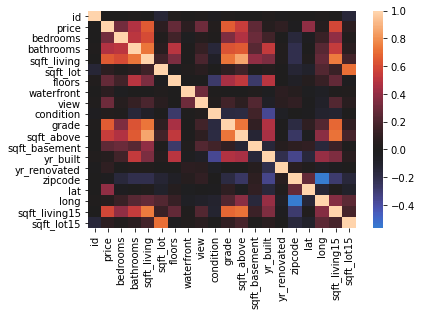

In [43]:
sns.heatmap(df_new.corr(), center=0)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   1.,
          1.,   1.,   1.,   2.,   2.,   0.,   3.,   2.,   1.,   4.,   5.,
          3.,   1.,   8.,   8.,  10.,  11.,  10.,   7.,   9.,   7.,  11.,
         18.,  23.,  15.,  19.,  38.,  28.,  43.,  49.,  58.,  61.,  74.,
         85.,  97., 107., 127., 123., 170., 175., 214., 227., 228., 282.,
        278., 271., 337., 338., 365., 404., 439., 489., 514., 530., 522.,
        524., 543., 575., 579., 587., 586., 591., 657., 572., 579., 550.,
        521., 487., 533., 489., 435., 406., 370., 363., 332., 282., 253.,
        221., 227., 227., 181., 176., 160., 132., 119., 114.,  98.,  99.,
         91.,  90.,  72.,  55.,  62.,  63.,  54.,  46.,  56.,  51.,  41.,
         37.,  41.,  41.,  39.,  28.,  25.,  27.,  24.,  20.,  24.,  25.,
         25.,  24.,  18.,  21.,  19., 

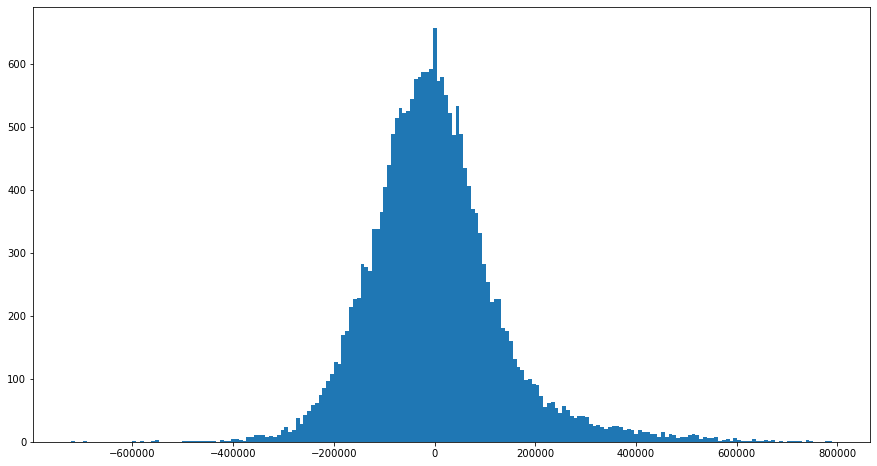

In [44]:
plt.figure(figsize=(15,8))
plt.hist(model_new.resid, bins=200)

#### MSE/RMSE

In [45]:
y_hat1 = model_new.predict(df_new.iloc[:,1:])
residuals1 = y_hat1 - df_new['price']
mse1 = np.sum((residuals1)**2)/len(df_new['price'])
print('MSE:', mse1)
print('RMSE Train:', np.sqrt(mse1))

MSE: 17338336456.221405
RMSE Train: 131675.11707312588


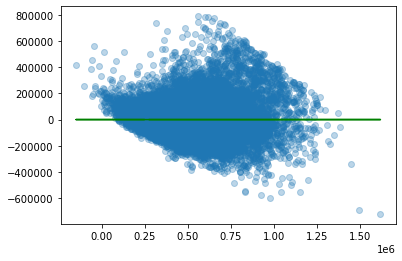

In [46]:
plt.scatter(model_new.predict(df_new[x_cols]), model_new.resid, alpha = .3)
plt.plot(model_new.predict(df_new[x_cols]), [0 for i in range(len(df_new[x_cols]))], c='g')
plt.savefig("Residual Overview New Model")

Here we can see the data has a u-shaped spread, and that something other than a linear model may be best fit for it.

### Log Model

In [47]:
outcome = df_log['log_price']
x_cols = df_log.columns[1:]

In [48]:
df_y = df_log['log_price'].to_frame()
X1 = '+'.join(list(x_cols))
y = list(df_y.columns)[0]
f = str(y) + '~' + X1

model_log = ols(formula= f, data=df_log).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     3465.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:04   Log-Likelihood:                -7646.6
No. Observations:               21419   AIC:                         1.531e+04
Df Residuals:                   21410   BIC:                         1.538e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.4292      0.072     75.110      0.000       5.287       5.571
log_bedrooms         -0.1605      0.011    -14.209      0.000      -0.183      -0.138
log_bathrooms        -0.1189      0.010    -12.036      0.000      -0.138      -0.100
log_sqft_living       0.6800      0.015     46.357      0.000       0.651       0.709
log_sqft_lot          0.0069      0.007      1.031      0.303      -0.006       0.020
log_grade             1.4270      0.027     53.367      0.000       1.375       1.479
log_sqft_living15     0.2639      0.012     22.263      0.000       0.241       0.287
log_sqft_above       -0.2106      0.012    -18.055      0.000      -0.234      -0.188
log_sqft_lot15       -0.0700      0.007     -9.429      0.000      -0.085      -0.055
==============================================================================
Omnibus:                       64.251   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.755
Skew:                           0.133   Prob(JB):                     8.68e-15
Kurtosis:                       3.040   Cond. No.                         567.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### QQ Plot and Histogram

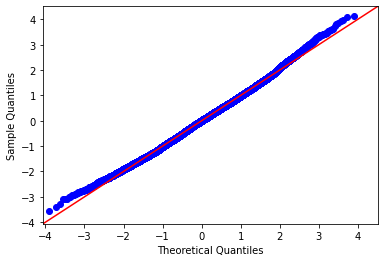

In [49]:
#  QQ Plot for Model Log
fig_log = sm.graphics.qqplot(model_log.resid, dist=stats.norm, line='45', fit=True)
plt.savefig("QQ Plot Log")

Our QQ plot for the log model seems solid, but may be prone to overfitting.

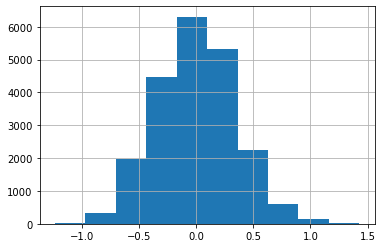

In [50]:
model_log.resid.hist()
plt.savefig("Histogram Log")

Here, our residual shows the data being much more symmetrical.

In [51]:
###Looking to see if any variables have high correlation (i.e- multicollinearity)

abs(df_log.corr()) > 0.75

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_grade,log_sqft_living15,log_sqft_above,log_sqft_lot15
log_price,True,False,False,False,False,False,False,False,False
log_bedrooms,False,True,False,False,False,False,False,False,False
log_bathrooms,False,False,True,True,False,False,False,False,False
log_sqft_living,False,False,True,True,False,False,False,True,False
log_sqft_lot,False,False,False,False,True,False,False,False,True
log_grade,False,False,False,False,False,True,False,False,False
log_sqft_living15,False,False,False,False,False,False,True,False,False
log_sqft_above,False,False,False,True,False,False,False,True,False
log_sqft_lot15,False,False,False,False,True,False,False,False,True


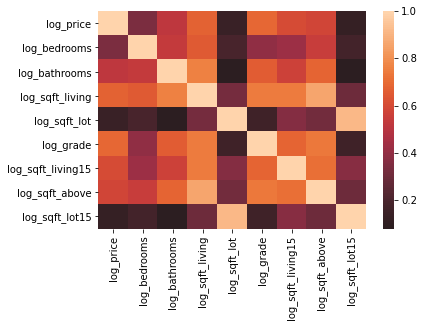

In [52]:
sns.heatmap(df_log.corr(), center=0)

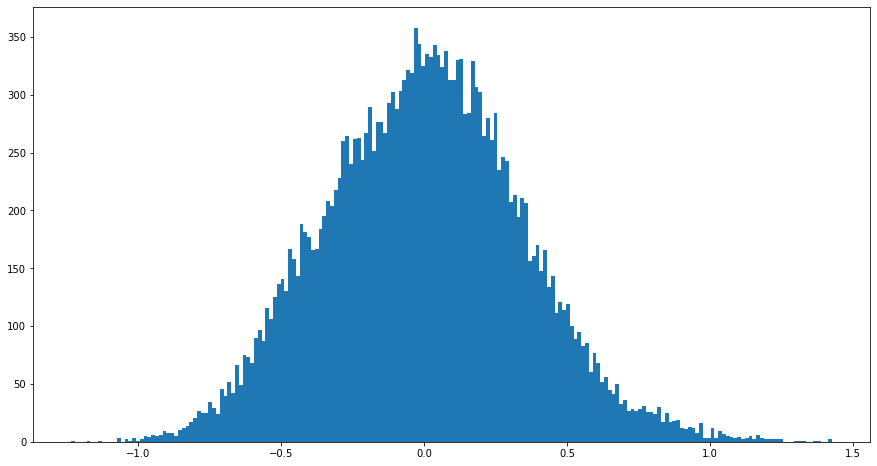

In [53]:
plt.figure(figsize=(15,8))
plt.hist(model_log.resid, bins=200)
plt.savefig("Residual Dist Log")

In [54]:
y_hat = model_log.predict(df_log.iloc[:,1:])
residuals = y_hat - df_log['log_price']
mse = np.sum((residuals)**2)/len(df_log['log_price'])
print('MSE:', mse)
print('RMSE Train:', np.sqrt(mse))

MSE: 0.11956782077499327
RMSE Train: 0.3457858018701654


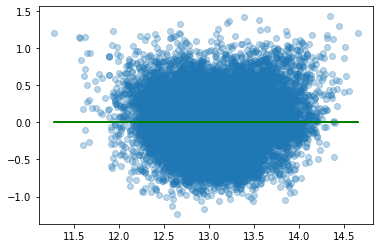

In [55]:
plt.scatter(model_log.predict(df_log[x_cols]), model_log.resid, alpha = .3)
plt.plot(model_log.predict(df_log[x_cols]), [0 for i in range(len(df_log[x_cols]))], c='g')
plt.savefig("Residual Overview Model Log")

### Zip/Filtered Model

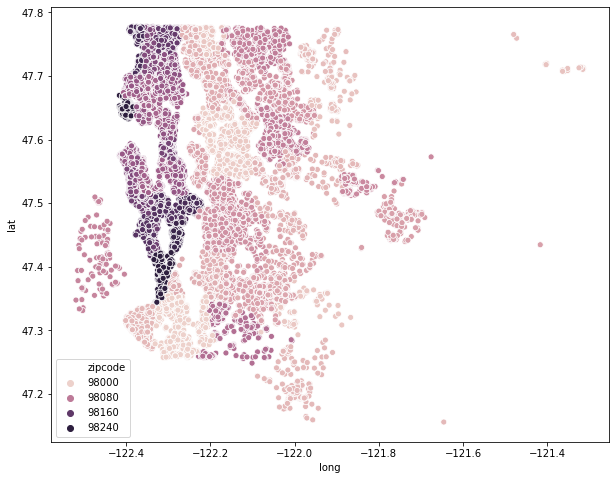

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'long', y = 'lat', hue = 'zipcode', data = df_new)

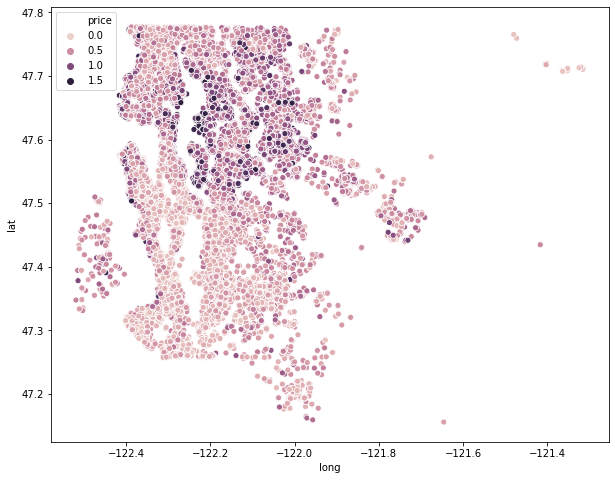

In [57]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'long', y = 'lat', hue = 'price', data = df_new)

In [58]:
df_new['zipcode'].value_counts(ascending=False).head(10)

98103    595
98038    586
98115    570
98052    569
98117    548
98042    546
98034    530
98118    495
98023    492
98133    484
Name: zipcode, dtype: int64

In [59]:
df_filtered = df_new[df_new['zipcode'].isin(df_new['zipcode'].value_counts(ascending=False).head(100).index)]

In [60]:
df_filtered.drop(columns = ['date', 'id'], inplace=True)

In [61]:
df_filtered.fillna(value = 0, inplace=True)

In [62]:
outcome = df_filtered['price']
x_cols = df_filtered.columns[1:]

In [63]:
df_y = df_filtered['price'].to_frame()
X1 = '+'.join(list(df_filtered.drop('price', axis = 1).columns))
y = list(df_y.columns)[0]
f = str(y) + '~' + X1

model_filtered = ols(formula= f, data=df_filtered).fit()
model_filtered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     2827.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:07   Log-Likelihood:            -2.7497e+05
No. Observations:               20836   AIC:                         5.500e+05
Df Residuals:                   20817   BIC:                         5.501e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.818e+06   1.94e+06     -3.003      0.003   -9.62e+06   -2.02e+06
bedrooms      -1.271e+04   1334.788     -9.521      0.000   -1.53e+04   -1.01e+04
bathrooms      2.727e+04   2197.550     12.410      0.000     2.3e+04    3.16e+04
sqft_living      70.3259     12.208      5.761      0.000      46.397      94.255
sqft_lot          0.1970      0.032      6.100      0.000       0.134       0.260
floors         3.279e+04   2407.127     13.621      0.000    2.81e+04    3.75e+04
waterfront     1.863e+05   1.62e+04     11.485      0.000    1.54e+05    2.18e+05
view           3.949e+04   1472.427     26.822      0.000    3.66e+04    4.24e+04
condition      2.736e+04   1554.336     17.600      0.000    2.43e+04    3.04e+04
grade           8.27e+04   1450.122     57.030      0.000    7.99e+04    8.55e+04
sqft_above       13.7796     12.194      1.130      0.258     -10.122      37.681
sqft_basement    13.5323     12.083      1.120      0.263     -10.152      37.217
yr_built      -2043.7957     48.105    -42.486      0.000   -2138.085   -1949.507
yr_renovated     19.1023      2.704      7.063      0.000      13.801      24.403
zipcode        -290.3828     21.861    -13.283      0.000    -333.231    -247.534
lat            5.625e+05   7031.570     79.999      0.000    5.49e+05    5.76e+05
long          -9.012e+04   8664.421    -10.401      0.000   -1.07e+05   -7.31e+04
sqft_living15    49.1849      2.394     20.549      0.000      44.493      53.877
sqft_lot15       -0.1695      0.049     -3.443      0.001      -0.266      -0.073
==============================================================================
Omnibus:                     3512.115   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10291.197
Skew:                           0.891   Prob(JB):                         0.00
Kurtosis:                       5.946   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### QQ Plot and Histogram

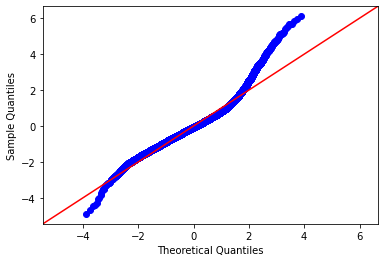

In [64]:
fig_log = sm.graphics.qqplot(model_filtered.resid, dist=stats.norm, line='45', fit=True)

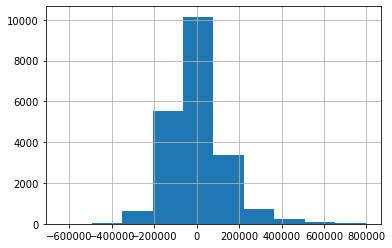

In [65]:
model_filtered.resid.hist()

In [66]:
###Looking to see if any variables have high correlation (i.e- multicollinearity)

abs(df_filtered.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


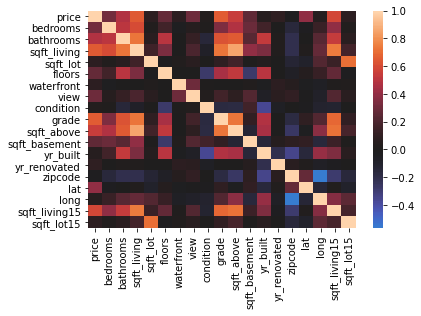

In [67]:
sns.heatmap(df_filtered.corr(), center=0)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   1.,   1.,   2.,   0.,   0.,   3.,   1.,   4.,   4.,   2.,
          1.,   4.,   4.,   3.,   7.,  10.,   6.,   6.,   7.,   4.,  11.,
          7.,  16.,   7.,  20.,  13.,  21.,  17.,  35.,  33.,  41.,  45.,
         55.,  58.,  71.,  79.,  91., 111., 105., 144., 155., 163., 166.,
        198., 250., 232., 238., 274., 294., 333., 316., 331., 405., 412.,
        447., 479., 495., 515., 510., 489., 558., 560., 603., 568., 578.,
        544., 550., 578., 545., 492., 513., 487., 450., 431., 404., 411.,
        366., 374., 332., 260., 272., 236., 233., 232., 180., 159., 153.,
        146., 107., 117., 102.,  83.,  89.,  81.,  83.,  67.,  72.,  52.,
         46.,  62.,  59.,  41.,  50.,  51.,  42.,  24.,  35.,  25.,  26.,
         26.,  23.,  30.,  39.,  21.,  15.,  21.,  15.,  21.,  16.,  14.,
         10.,  21.,  16.,  17.,  10., 

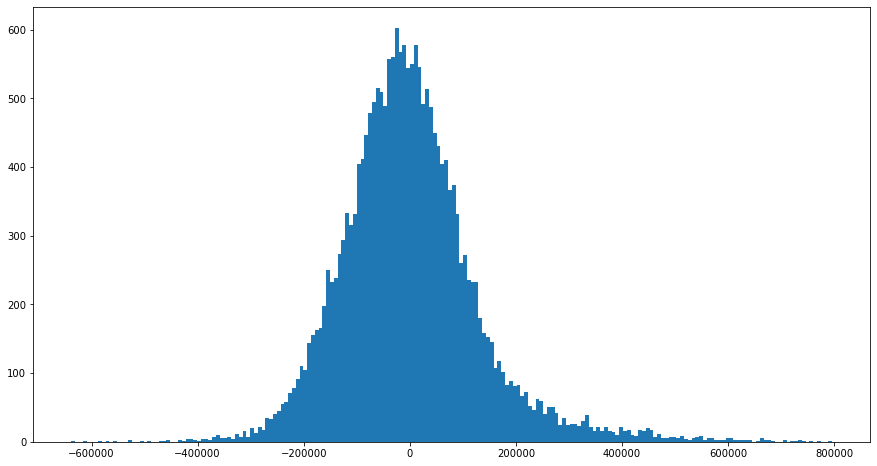

In [68]:
plt.figure(figsize=(15,8))
plt.hist(model_filtered.resid, bins=200)

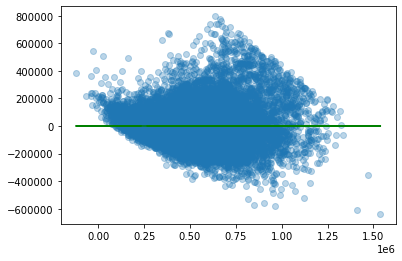

In [69]:
plt.scatter(model_filtered.predict(df_filtered[x_cols]), model_filtered.resid, alpha = .3)
plt.plot(model_filtered.predict(df_filtered[x_cols]), [0 for i in range(len(df_filtered[x_cols]))], c='g')
plt.savefig("Residual Overview Model Filtered")

### Log/Zip Model w/Dummies

In [70]:
zipcodes = pd.get_dummies(df_filtered['zipcode'], prefix = 'zipcode')

In [71]:
zipcodes

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
conditions = pd.get_dummies(df_filtered['condition'], prefix = 'condition')

In [73]:
conditions

,condition_1,condition_2,condition_3,condition_4,condition_5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
21592,0,0,1,0,0
21593,0,0,1,0,0
21594,0,0,1,0,0
21595,0,0,1,0,0


In [74]:
df_log_with_zips = pd.concat([df_log, zipcodes, conditions], axis = 1)

In [75]:
df_log_with_zips.head()

,log_price,log_bedrooms,log_bathrooms,log_sqft_living,log_sqft_lot,log_grade,log_sqft_living15,log_sqft_above,log_sqft_lot15,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,condition_1,condition_2,condition_3,condition_4,condition_5
0,12.309982,1.098612,0.000000,7.073270,8.639411,1.945910,7.200425,7.073270,8.639411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13.195614,1.098612,0.810930,7.851661,8.887653,1.945910,7.432484,7.682482,8.941022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.100712,0.693147,0.000000,6.646391,9.210340,1.791759,7.908387,6.646391,8.994917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.311329,1.386294,1.098612,7.580700,8.517193,1.945910,7.215240,6.956545,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13.142166,1.098612,0.693147,7.426549,8.997147,2.079442,7.495542,7.426549,8.923058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Running L&Z Model

In [76]:
outcome = df_log_with_zips['log_price']
x_cols = df_log_with_zips.columns[1:]

In [77]:
df_y = df_log_with_zips['log_price'].to_frame()
X1 = '+'.join(list(df_log_with_zips.drop('log_price', axis = 1).columns))
y = list(df_y.columns)[0]
f = str(y) + '~' + X1

model_log_with_zips = ols(formula= f, data=df_log_with_zips).fit()
model_log_with_zips.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1461.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:07:09   Log-Likelihood:                 6010.2
No. Observations:               20836   AIC:                        -1.186e+04
Df Residuals:                   20754   BIC:                        -1.121e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.2973      0.037    143.283      0.000       5.225       5.370
log_bedrooms         -0.0634      0.006    -10.296      0.000      -0.076      -0.051
log_bathrooms         0.0410      0.005      7.553      0.000       0.030       0.052
log_sqft_living       0.3219      0.008     38.976      0.000       0.306       0.338
log_sqft_lot          0.0794      0.004     21.644      0.000       0.072       0.087
log_grade             0.6294      0.015     41.288      0.000       0.599       0.659
log_sqft_living15     0.2003      0.007     29.479      0.000       0.187       0.214
log_sqft_above        0.1092      0.007     16.178      0.000       0.096       0.122
log_sqft_lot15       -0.0163      0.004     -3.978      0.000      -0.024      -0.008
zipcode_98001        -0.4191      0.010    -43.489      0.000      -0.438      -0.400
zipcode_98002        -0.4069      0.013    -31.389      0.000      -0.432      -0.382
zipcode_98003        -0.3911      0.011    -35.837      0.000      -0.412      -0.370
zipcode_98004         0.6449      0.013     49.760      0.000       0.620       0.670
zipcode_98005         0.3044      0.014     21.249      0.000       0.276       0.333
zipcode_98006         0.2383      0.009     26.842      0.000       0.221       0.256
zipcode_98007         0.2353      0.015     15.340      0.000       0.205       0.265
zipcode_98008         0.2508      0.011     22.809      0.000       0.229       0.272
zipcode_98010        -0.1827      0.018    -10.007      0.000      -0.219      -0.147
zipcode_98011         0.0182      0.013      1.399      0.162      -0.007       0.044
zipcode_98014        -0.1293      0.017     -7.700      0.000      -0.162      -0.096
zipcode_98019        -0.1219      0.013     -9.210      0.000      -0.148      -0.096
zipcode_98022        -0.3482      0.012    -28.870      0.000      -0.372      -0.325
zipcode_98023        -0.4341      0.008    -52.564      0.000      -0.450      -0.418
zipcode_98024        -0.0156      0.021     -0.725      0.468      -0.058       0.027
zipcode_98027         0.0887      0.009      9.657      0.000       0.071       0.107
zipcode_98028        -0.0086      0.011     -0.794      0.427      -0.030       0.013
zipcode_98029         0.1873      0.010     18.075      0.000       0.167       0.208
zipcode_98030        -0.3721      0.011    -32.618      0.000      -0.395      -0.350
zipcode_98031        -0.3568      0.011    -32.360      0.000      -0.378      -0.335
zipcode_98032        -0.4224      0.016    -25.972      0.000      -0.454      -0.391
zipcode_98033         0.3618      0.009     39.428      0.000       0.344       0.380
zipcode_98034         0.1224      0.008     15.391      0.000       0.107       0.138
zipcode_98038        -0.2642      0.008    -34.245      0.000      -0.279

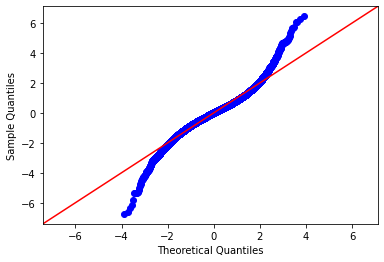

In [78]:
fig_log_with_zips = sm.graphics.qqplot(model_log_with_zips.resid, dist=stats.norm, line='45', fit=True)

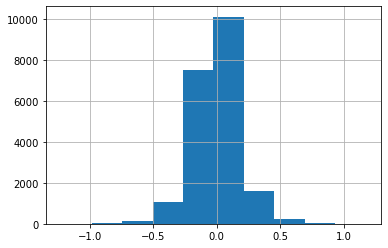

In [79]:
model_log_with_zips.resid.hist()

(array([  1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,
          2.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,
          1.,   2.,   2.,   3.,   2.,   2.,   3.,   1.,   2.,   6.,   4.,
          5.,   3.,   4.,   3.,   4.,   6.,   1.,   3.,   5.,  11.,   7.,
         12.,  17.,  15.,  18.,  20.,  22.,  13.,  21.,  30.,  35.,  27.,
         32.,  27.,  38.,  54.,  41.,  47.,  53.,  61.,  81.,  88., 109.,
         86., 100., 122., 148., 143., 169., 198., 197., 230., 249., 275.,
        273., 325., 385., 421., 432., 482., 489., 566., 594., 654., 645.,
        664., 715., 692., 708., 708., 720., 621., 643., 626., 620., 542.,
        517., 503., 416., 373., 371., 333., 305., 284., 217., 215., 208.,
        143., 148., 148., 122., 125.,  93.,  82.,  61.,  68.,  73.,  62.,
         67.,  45.,  35.,  34.,  25.,  28.,  35.,  23.,  25.,  17.,  20.,
         17.,  16.,   9.,  10.,  10., 

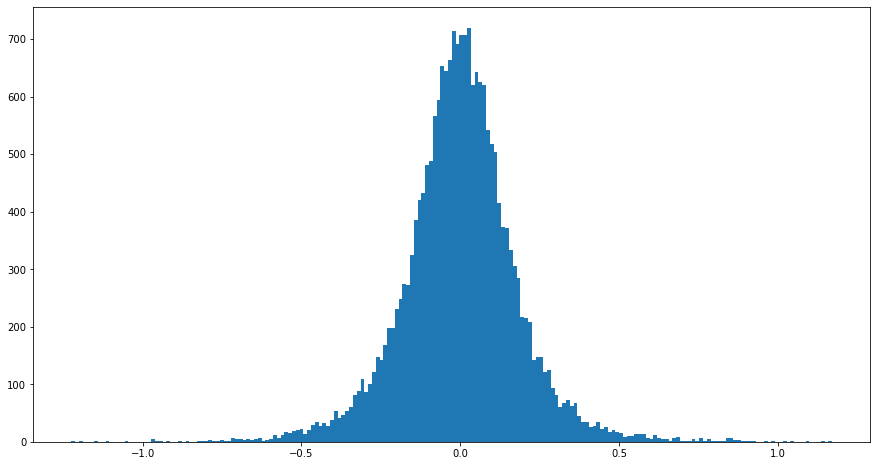

In [80]:
plt.figure(figsize=(15,8))
plt.hist(model_log_with_zips.resid, bins=200)

In [84]:
for col in df_log_with_zips.columns:
    df_log_with_zips[col] = df_log_with_zips[col].map(lambda x: np.exp(x))
    df_log_with_zips.head()



In [86]:
y_hat = model_log_with_zips.predict(df_log_with_zips.iloc[:,1:])
residuals = y_hat - df_log_with_zips['log_price']
mse = np.sum((residuals)**2)/len(df_log_with_zips['log_price'])
print('MSE:', mse)
print('RMSE Train:', np.sqrt(mse))

MSE: 297350623402.5863
RMSE Train: 545298.6552363634


# Interpret Findings

#### The Biggest Takeaways

ZIPCODE--is a strong predictor of a homes value, the saying "Location, Location, Location" holds true, 
as even in a similar area the location plays a huge factor in the value of a home.

STRONGEST FEATURES-- What do SqFt, Grade and Bathrooms and  have in common...?  They MATTER, all 3 are significant factors when judging a homes value in the given dataset.

SKEWNESS- Data has slight left skew, which makes sense because there are more homes available in a lower budget rather than a high one.

### Future Work

---Need to go back and convert ZIPCODE w/OHE instead of dummies